#### Nama : Fadlila Agustina
#### NPM : 21083010050
#### Kelas : Statistika Komputasi (C)

### *Ulangan Akhir Semester*

In [2]:
import numpy as np

In [3]:
sample = [55, 84, 99, 51, 22, 77, 39, 63, 10, 66]

#### **No. 1** 

##### **a. Mean Boostrap**

In [54]:
def btmean(data, r = 200, k = 2, alpha = 0.05):
    import random
    import numpy as np
    from sklearn.metrics import mean_squared_error
    import scipy.stats as st
    list_1 = []
    mean_true = np.repeat(np.mean(data), r)
    print("Start Bootsrapping")
    for i in range(r):
        list_2 =[]
        for j in range(k):
            list_2.append(random.sample(data, 1))
        mean_sample = np.mean(list_2)
        list_1.append(mean_sample)
    print("End Bootsrapping")
    mean_resamp = np.mean(list_1)
    var_mean_resamp = np.var(list_1)
    mse_mean_resamp = mean_squared_error(list_1, mean_true)
    ci_mean_resamp = [np.mean(data) - st.norm.ppf(1-alpha/2)*var_mean_resamp**0.5, np.mean(data) + st.norm.ppf(1-alpha/2)*var_mean_resamp**0.5]
    return list_1, mean_resamp, var_mean_resamp, mse_mean_resamp, ci_mean_resamp

In [55]:
resample, mean_resample, var_mean_resample, mse_mean_resample, ci_mean_resample = btmean(data= list(sample), r = 200, k = 70)

Start Bootsrapping
End Bootsrapping


In [56]:
print("Mean Bootstrap yang didapatkan : ", mean_resample)

Mean Bootstrap yang didapatkan :  56.48721428571428


##### **b. Varians Bootsrap**

In [153]:
def btvarians(data, r = 200, k = 2, alpha = 0.05):
    import random
    import numpy as np
    from sklearn.metrics import mean_squared_error
    import scipy.stats as st
    list_1 = []
    for i in range(r):
        list_2 = []
        for j in range(k):
            list_2.append(random.sample(data, 1))
        var_sample = np.var(list_2)
        list_1.append(var_sample)
    var_resamp = np.mean(list_1)
    return list_1, var_resamp

In [154]:
_, var_resample = btvarians(data=list(sample), r = 200, k=50)
print("Varians Bootstrap yang didapatkan : ",var_resample)

Varians Bootstrap yang didapatkan :  682.800344


##### **c. Mean Jackknife**

In [155]:
theta_list = []
resample_list=[]
def stand_error_mean(sample):
    for index, i in enumerate(sample):
        sample_copy = sample.copy()
        del sample_copy[index]
        resample_list.append(sample_copy)
        theta_list.append(np.mean(sample_copy))
    SEM = (((len(sample)-1)/(len(sample)))*(sum((theta_list - np.mean(theta_list))**2)))**0.5
    return resample_list, theta_list, SEM

In [156]:
resample_list, theta_list, SEM = stand_error_mean(sample)

In [157]:
resample_list

[[84, 99, 51, 22, 77, 39, 63, 10, 66],
 [55, 99, 51, 22, 77, 39, 63, 10, 66],
 [55, 84, 51, 22, 77, 39, 63, 10, 66],
 [55, 84, 99, 22, 77, 39, 63, 10, 66],
 [55, 84, 99, 51, 77, 39, 63, 10, 66],
 [55, 84, 99, 51, 22, 39, 63, 10, 66],
 [55, 84, 99, 51, 22, 77, 63, 10, 66],
 [55, 84, 99, 51, 22, 77, 39, 10, 66],
 [55, 84, 99, 51, 22, 77, 39, 63, 66],
 [55, 84, 99, 51, 22, 77, 39, 63, 10]]

In [158]:
theta_list

[56.77777777777778,
 53.55555555555556,
 51.888888888888886,
 57.22222222222222,
 60.44444444444444,
 54.333333333333336,
 58.55555555555556,
 55.888888888888886,
 61.77777777777778,
 55.55555555555556]

In [159]:
print('Mean Jackknife yang didapatkan :', SEM)

Mean Jackknife yang didapatkan : 8.696359391530843


##### **d. Varians Jackknife**

In [160]:
theta_list = []
resample_list=[]
def stand_error_var(sample):
    for index, i in enumerate(sample):
        sample_copy = sample.copy()
        del sample_copy[index]
        resample_list.append(sample_copy)
        theta_list.append(np.var(sample_copy))
    SEV = (((len(sample)-1)/(len(sample)))*(sum((theta_list - np.mean(theta_list))**2)))**0.5
    return resample_list, theta_list, SEV

In [161]:
resample_list, theta_list, SEV = stand_error_var(sample)

In [162]:
resample_list

[[84, 99, 51, 22, 77, 39, 63, 10, 66],
 [55, 99, 51, 22, 77, 39, 63, 10, 66],
 [55, 84, 51, 22, 77, 39, 63, 10, 66],
 [55, 84, 99, 22, 77, 39, 63, 10, 66],
 [55, 84, 99, 51, 77, 39, 63, 10, 66],
 [55, 84, 99, 51, 22, 39, 63, 10, 66],
 [55, 84, 99, 51, 22, 77, 63, 10, 66],
 [55, 84, 99, 51, 22, 77, 39, 10, 66],
 [55, 84, 99, 51, 22, 77, 39, 63, 66],
 [55, 84, 99, 51, 22, 77, 39, 63, 10]]

In [163]:
theta_list

[755.9506172839506,
 663.5802469135801,
 534.320987654321,
 752.3950617283949,
 608.4691358024692,
 704.8888888888889,
 718.0246913580246,
 751.2098765432098,
 488.17283950617286,
 745.3580246913581]

In [164]:
print('Varians Jackknife yang didapatkan :', SEV)

Varians Jackknife yang didapatkan : 276.9457667043734


##### **e. Rata-rata Data**

In [165]:
print("Rata-rata Data :", np.mean(sample))

Rata-rata Data : 56.6


##### **f. MSE**

In [167]:
print("Error Bootsrap :", mse_mean_resample)

Error Bootsrap : 10.235627551020409


##### **g. Confident Interval 0.05**

In [168]:
print("CI Mean Bootsrap :", ci_mean_resample)

CI Mean Bootsrap : [50.33335209114992, 62.866647908850084]


##### **h. Analisis**

Dari percobaan yang sudah saya lakukan, analisis yang didapatkan adalah hasil dari Mean Bootstrap sebesar 56.5 sedangkan rata-rata datanya adalah 56.6. Hasil Varians Bootsrapnya yaitu 682.8 yang bisa dikatakan jauh berbeda dengan Varians Jackknife yg bernilai 276.9. Serta didapatkan juga Mean Jackknife 8.7. Mean Squared Error Bootsrap dengan hasil 10.2 dengan Confident Interval 50.3 < 62.9

#### **No. 2**

In [172]:
u = np.random.uniform(size=1000)
gu = np.corrcoef(u,(1-(u)**2)**0.5)
theta_hat = np.mean(gu)
print(theta_hat)

0.03891965602074546


In [173]:
u = np.random.uniform(size=1000)
u2 = u**2
gu = np.corrcoef(u2,(1-(u)**2)**0.5)
theta_hat = np.mean(gu)
print(theta_hat)

0.008101665812667525


#### **No. 3**

In [183]:
n = 100
u1 = np.random.uniform(low=-1.00, high=1.00, size=n)
u2 = np.random.uniform(low=-1.00, high=1.00, size=n)
s = u1 + u2
theta_hat = sum(s<1)
print(theta_hat)

83


In [195]:
n = 1000
u1 = np.random.uniform(low=-1.00, high=1.00, size=n)
u2 = np.random.uniform(low=-1.00, high=1.00, size=n)
s = (u1)**2 + (u2)**2
theta_hat = sum(s<1)
print(theta_hat)

809


#### **No. 4**

In [196]:
import seaborn as sns

##### **a. Metode Invers**

C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

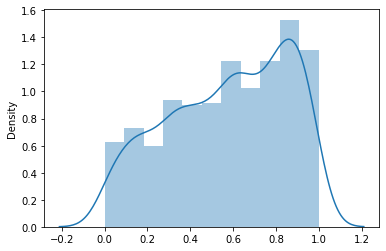

In [200]:
u = np.random.uniform(size=1000)
def inverse_no4(u):
    return (-1 + np.sqrt(1 + 8 * u)) / 2 

sns.distplot(inverse_no4(u))

##### **b. Metode Acceptance - Rejection**

C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

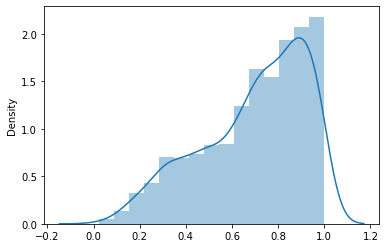

In [201]:
import numpy as np
def acceptance_rejection():
    c = 2
    while True:
        x = np.random.rand() 
        u = np.random.rand()
        g = 1
        f = 0.5 * (x + x**2)
        if u <= f / (c*g):
            return x

random_vars = [acceptance_rejection() for _ in range(1000)] 
sns.distplot(random_vars)

#### **No. 5**

##### **a. Metode Invers**

C:\Users\fadli\AppData\Local\Temp\ipykernel_1616\1940758795.py:3: RuntimeWarning: invalid value encountered in power
  return (4*u - 1)**(1/4)
C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

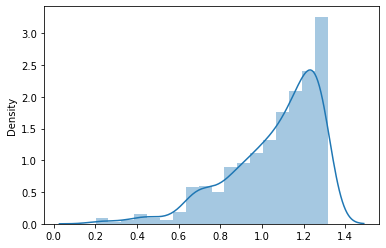

In [202]:
u = np.random.uniform(size=1000)
def inverse_no5(u):
    return (4*u - 1)**(1/4) 

sns.distplot(inverse_no5(u))

##### **b. Metode Acceptance - Rejection**

C:\Users\fadli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

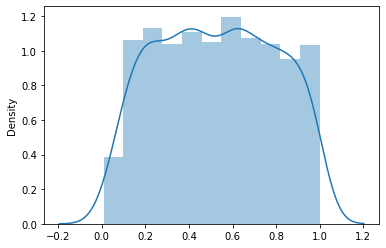

In [203]:
import numpy as np

def acceptance_rejection():
    c = 2
    while True:
        x = np.random.rand() 
        u = np.random.rand()
        g = 1
        f = 1/4 + 2*x*3 + 5/4*x*4
        if u <= f / (c*g):
            return x

random_vars = [acceptance_rejection() for _ in range(1000)] 

sns.distplot(random_vars)